In [9]:
import numpy as np 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

def generate_data(n):
    X=[]
    y=[]
    for i in range(n):
        if i<=n/2:
            X.append(np.random.normal(loc=4,scale=1))
            y.append(0)
        else:
            X.append(np.random.normal(loc=8,scale=1))
            y.append(1)
    return np.array(X).reshape(n,1),np.array(y)           

def sigmoid(z): 
    return 1/(1 + np.exp(-z))

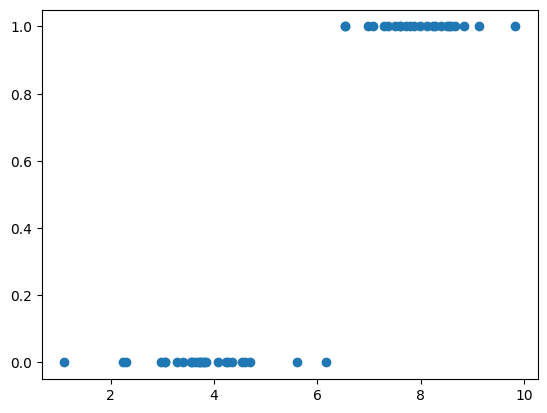

In [11]:
n = 50 
p = 1 
X, y = generate_data(n)

plt.scatter(X, y)


In [7]:
clf = LogisticRegression(random_state=0).fit(X, y)

In [13]:
print("Coef" , clf.coef_) 
print("Interscept", clf.intercept_)

Coef [[2.02531124]]
Interscept [-12.78517173]


In [18]:
print(X.shape)

(50, 1)


In [52]:
def gradient_descent(X, y, learning_rate=0.01, num_iterations=10000):
    """Gradient descent for logistic regression."""
    # Initialize coefficients and intercept
    num_features = X.shape[1]
    coef = np.zeros((num_features))
    intercept =0
  
    # Number of training examples
    m = len(y)
    
    for _ in range(num_iterations):
        # Compute predictions
     
        z = np.dot(X, coef) + intercept
        predictions = sigmoid(z)
        
        # Compute errors
        errors = predictions - y
        
        # Compute gradients
        coef_gradient = np.dot(X.T, errors) / m
        intercept_gradient = np.sum(errors) / m
        
        # Update coefficients and intercept
       
        coef -= learning_rate * coef_gradient
        intercept -= learning_rate * intercept_gradient
    
    return coef, intercept

In [53]:
coef , inter = gradient_descent(X, y )

In [54]:
print(coef)
print(inter)

[1.09045748]
-6.1966647160635


In [56]:
def plot_sigmoid(X, y, coef, intercept):
    """Plot sigmoid curve along with data points."""
    # Generate a range of values for the input variable
    x_values = np.linspace(np.min(X), np.max(X), 100)
    
    # Compute corresponding output values using the sigmoid function
    z = np.dot(x_values.reshape(-1, 1), coef) + intercept
    sigmoid_values = sigmoid(z)


    x1_values = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
    
    # Compute corresponding X2 values using the equation of the decision boundary line
    x2_values = -(coef[0] / coef[1]) * x1_values - (intercept / coef[1])

    plt.plot(x1_values, x2_values, label='Decision Boundary', color='green')
    
    
    # Plot sigmoid curve
    plt.plot()
    plt.plot(x_values, sigmoid_values, label='Sigmoid Curve', color='blue')
    
    # Plot data points
    plt.scatter(X, y, color='red', label='Data Points')
    
    # Add labels and legend
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Sigmoid Curve and Data Points')
    plt.legend()
    
    # Show plot
    plt.show()

In [57]:
plot_sigmoid(X, y , coef , inter)

IndexError: index 1 is out of bounds for axis 1 with size 1